In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Классификация

In [3]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

In [4]:
# первый класс
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [5]:
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

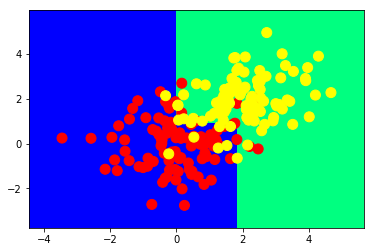

In [6]:
xx, yy = get_grid(train_data)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='winter')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn')

In [7]:
iris_df = sns.load_dataset("iris")
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
#Вообще нужно пристально смотреть на данные, построить совместные распределения признаков итд
#но у нас плохо со временем
iris_grouped = iris_df.groupby(by='species')
iris_grouped.describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

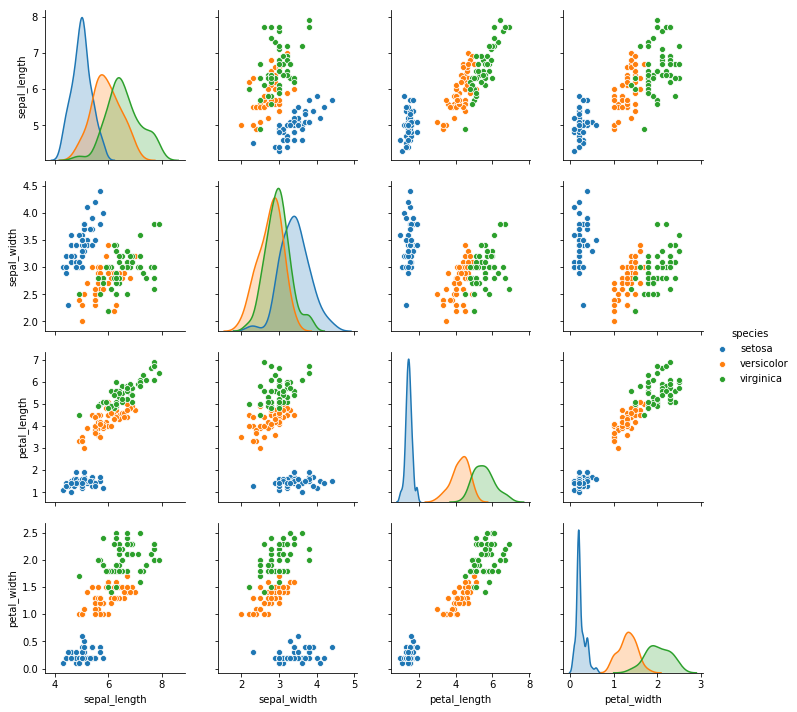

In [11]:
sns.pairplot(iris_df, hue='species')

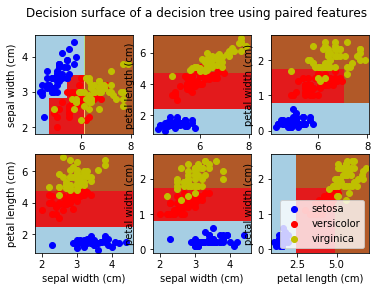

In [10]:
# slightly simplified sklearn example
# see http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3 
plot_colors = "bry"
plot_step = 0.005

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [12]:
#TODO давайте попробуем применить Дерево Классификации для данных рост-пол-возраст
#Загрузим данные, итд итп
df = pd.read_csv("data/Howell1.csv", sep=";")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,height,weight,age,male
0,156.845,53.041914,41.0,1
1,163.830,62.992589,35.0,1
2,149.225,38.243476,32.0,0
3,168.910,55.479971,27.0,1
4,147.955,34.869885,19.0,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("male", axis=1), df['male'],
                                                    random_state=13, test_size=0.2, stratify=df['male'])

In [16]:
from sklearn.metrics import precision_score

In [17]:
cls = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
precision_score(y_true=y_test, y_pred=cls.predict(X_test))

0.95

pip install pydotplus
sudo apt install python-pydot python-pydot-ng graphviz

In [19]:
from sklearn.externals.six import StringIO  
import pydotplus as pydot
from IPython.display import Image  
from sklearn.tree import export_graphviz

def show_tree(clf):
    dot_data = StringIO()  
    export_graphviz(clf, out_file=dot_data,  
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)  
    graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [20]:
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(iris.data, iris.target)
show_tree(clf)

InvocationException: GraphViz's executables not found

In [21]:
cls.feature_importances_

array([1., 0., 0.])

In [18]:
#TODO нарисовать дерево, которые получилось для пола-возраста

# Регрессия

Давайте поприпарируем немного линейную регрессию:

Пусть задано множество ${y_i}$  $i=\overline{1..n}$

1) Решим задачу регрессии вида $y = \beta + \epsilon$

$$
\hat{y_i} = \beta 
$$
Решим с помощью МНК:
$$
min(\sum_{i=1}^{N}\left(\ y_i - \hat{y_i})\ \right) ^ 2) = min(\sum_{i=1}^{N}\left(\ y_i - \beta)\ \right) ^ 2 \\
-2\sum_{i=1}^{N}(y_i - \beta) = 0 \\
\beta = \frac{\sum_{i=1}^{N}(y_i)}{N} \\
$$

Теперь давайте посмотрим на геометрическую интерпретацию полученного решения. Пусть нам дан вектор $y=(y_1, y_2, ... y_n)$, обозначим за $\bar{1}$ вектор вида $(1, 1, ...)$, и за $\hat{y} = \bar{y} \bar{1}$ вектор наших оценок, полученных простой моделью регрессии на константу. Очевидно, из геометрической интерпретации, что $y=\hat{y} + \bar{\epsilon_i}$. 

$$
\sum_{i=1}^{N}\hat{y_i}=\sum_{i=1}^{N}\bar{y}=n*\bar{y}=\sum_{i=1}^{N}y_i \\
\sum_{i=1}^{N}\hat{y_i} = \sum_{i=1}^{N}y_i \\
\sum_{i=1}^{N}(\hat{y_i} - y_i) = 0 \\
\sum_{i=1}^{N}\epsilon_i = 0 \\
\sum_{i=1}^{N}\epsilon_i * 1 = 0 \\
(\bar{\epsilon}, \bar{1}) = 0 \\
\bar{\epsilon} \perp \bar{1}
$$

Что это значит? Это значит, что проекция вектора $y=(y_1, y_2, ... y_n)$ на вектор из единиц получим оценку вектора $\bar{\hat{y}}$ в модели с константным предиктором. Кажется просто? И какой из этого толк?

Это просто подготовка: усложним задачу.

2) Решим задачу регрессии вида $y = \beta_0 + \beta_1 * x + \beta_2 * z$

Какие выводы можем сделать из предыдущего шага?
$$
\bar{\epsilon} \perp \bar{1} \\
\bar{x} \perp \bar{\epsilon} \\
\bar{\epsilon} \perp \bar{z}
$$
Отсюда можно получить оценки на все коэффициенты, но важно не это. Линейная комбинация векторов перпендикулярных заданному - перпендикулярна ему. То есть $\hat{y} \perp \hat{\epsilon}$, значит у нас по-прежнему прямоугольный треугольник. Но заметим еще, что из условий 1 порядка $\sum\epsilon_i = 0$, откуда $\sum\hat{y_i}=\sum(y_i)$ и $\bar{y}=\bar{\hat{y}}$. То есть проекции векторов предсказаний и целевых переменных попадут в 1 точку на векторе $\bar{1}$. По теореме о 3-х перпендикулярах получаем прямоугольный треугольник. Давайте порисуем.

In [ ]:
#давайте попробуем сделать пень

def compute_loss(threshold, x, y):
    #TODO реализовать функцию подсчета лосса
    

def decision_stump(x, y):
    #TODO реализовать решающий пень, подобрать лучший порог
    

In [19]:
#TODO Проверим нашу регрессию как регрессию веса на рост

In [20]:
n_train = 150        
n_test = 1000       
noise = 0.1


def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)


tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)
d_predict = tree.predict(X_test)

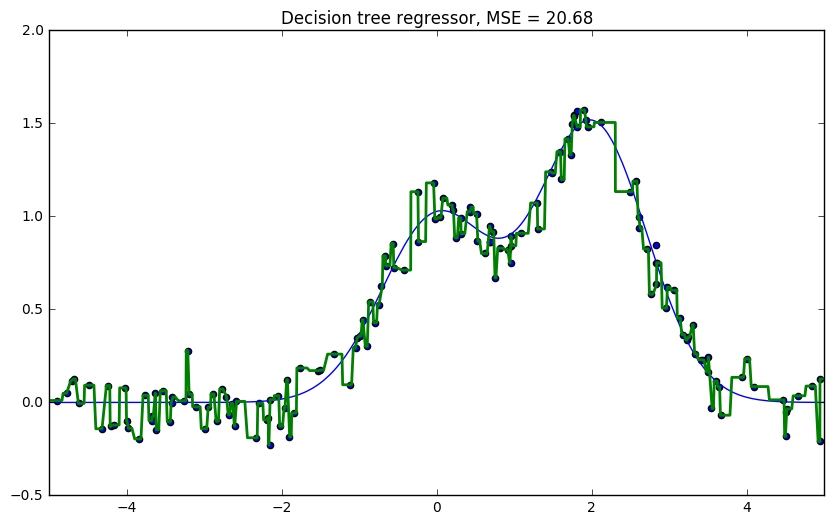

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - d_predict) ** 2))
plt.show()

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(tree, feature_names=['f1'], out_file='example.dot')
!dot -Tpng 'example.dot' -o 'example.png'

In [23]:
def get_rules(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print("}")
                else:
                        print("return " + str(value[node]))

        recurse(left, right, threshold, features, 0)

In [24]:
get_rules(tree, feature_names=['f1', 'f2'])

if ( f1 <= -0.8807779550552368 ) {
if ( f1 <= -1.8066763877868652 ) {
if ( f1 <= -4.403725624084473 ) {
if ( f1 <= -4.741341590881348 ) {
if ( f1 <= -4.836519718170166 ) {
return [[0.01043084]]
} else {
return [[0.04935485]]
}
} else {
if ( f1 <= -4.649864196777344 ) {
if ( f1 <= -4.69793701171875 ) {
return [[0.11687916]]
} else {
return [[0.12682463]]
}
} else {
if ( f1 <= -4.54749870300293 ) {
return [[-0.00567493]]
} else {
return [[0.0927947]]
}
}
}
} else {
if ( f1 <= -3.8038687705993652 ) {
if ( f1 <= -3.985968589782715 ) {
if ( f1 <= -4.282275199890137 ) {
return [[-0.14161483]]
} else {
if ( f1 <= -4.219086170196533 ) {
return [[0.09079572]]
} else {
if ( f1 <= -4.0931267738342285 ) {
if ( f1 <= -4.182501316070557 ) {
return [[-0.12907233]]
} else {
return [[-0.12114649]]
}
} else {
if ( f1 <= -4.006514072418213 ) {
return [[0.07812544]]
} else {
return [[-0.09980256]]
}
}
}
}
} else {
if ( f1 <= -3.9092063903808594 ) {
return [[-0.13921343]]
} else {
return [[-0.19605054]]
}
